In [1]:
# Import dependencies
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read data
red_zone_line_player_proximity = pd.read_csv('https://storage.googleapis.com/big-data-bowl/redZoneLinePlayerProximity.csv')

In [3]:
matchup_threshold = 1

In [4]:
red_zone_matchups = red_zone_line_player_proximity[red_zone_line_player_proximity['distance'] <= matchup_threshold]
red_zone_matchups = red_zone_matchups[['gameId', 'playId', 'nflId', 'nflId2']].groupby(['gameId', 'playId', 'nflId', 'nflId2']).first().reset_index()

In [5]:
# Define function to get random matchup play
def get_random_matchup():
    slice = red_zone_matchups[['gameId', 'playId', 'nflId', 'nflId2']].sample(n=1)
    return slice.iloc[0,0], slice.iloc[0,1], slice.iloc[0,2], slice.iloc[0,3]

2021092600 1440 52462.0 53480.0


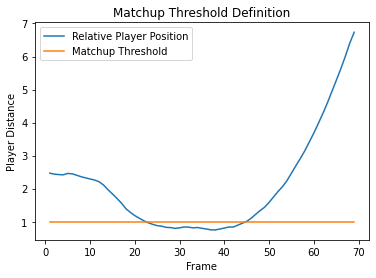

In [35]:
# Plot data

# Get random matchup for plot
gameId, playId, nflId, nflId2 = get_random_matchup()
print(gameId, playId, nflId, nflId2)

matchup_data = red_zone_line_player_proximity[
    (red_zone_line_player_proximity['gameId'] == gameId) & \
    (red_zone_line_player_proximity['playId'] == playId) & \
    (red_zone_line_player_proximity['nflId'] == nflId) & \
    (red_zone_line_player_proximity['nflId2'] == nflId2)
]

# Initialize plot
fig = plt.figure()
ax = fig.add_subplot()

plt.plot(
    matchup_data['frameId'],
    matchup_data['distance']
)

plt.plot(
    matchup_data['frameId'],
    [matchup_threshold for x in matchup_data['frameId']]
)

plt.legend(["Relative Player Position", "Matchup Threshold"], loc ="upper left")
plt.xlabel("Frame")
plt.ylabel("Player Distance")
    
plt.title('Matchup Threshold Definition')

plt.show()